In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from statsmodels.tsa.ar_model import AR

In [2]:
datosGas = pd.read_csv('consumo_gas.csv',encoding='latin-1', sep=';')

In [3]:
datosGas.head()

,Consumo,Dia,Mes,anio,DiaSemana,Feriado
0,716,20,10,1995,Viernes,0
1,605,21,10,1995,Sábado,1
2,555,22,10,1995,Domingo,1
3,680,23,10,1995,Lunes,0
4,713,24,10,1995,Martes,0


In [4]:
datosGas['Fecha'] = pd.to_datetime(datosGas.apply(lambda x:'%s/%s/%s' % (x['Dia'],x['Mes'],x['anio']),axis=1))

In [5]:
datosGas.head()

,Consumo,Dia,Mes,anio,DiaSemana,Feriado,Fecha
0,716,20,10,1995,Viernes,0,1995-10-20
1,605,21,10,1995,Sábado,1,1995-10-21
2,555,22,10,1995,Domingo,1,1995-10-22
3,680,23,10,1995,Lunes,0,1995-10-23
4,713,24,10,1995,Martes,0,1995-10-24


In [6]:
serie = pd.DataFrame({ 'A' : range(0, datosGas.shape[0] ,1)})

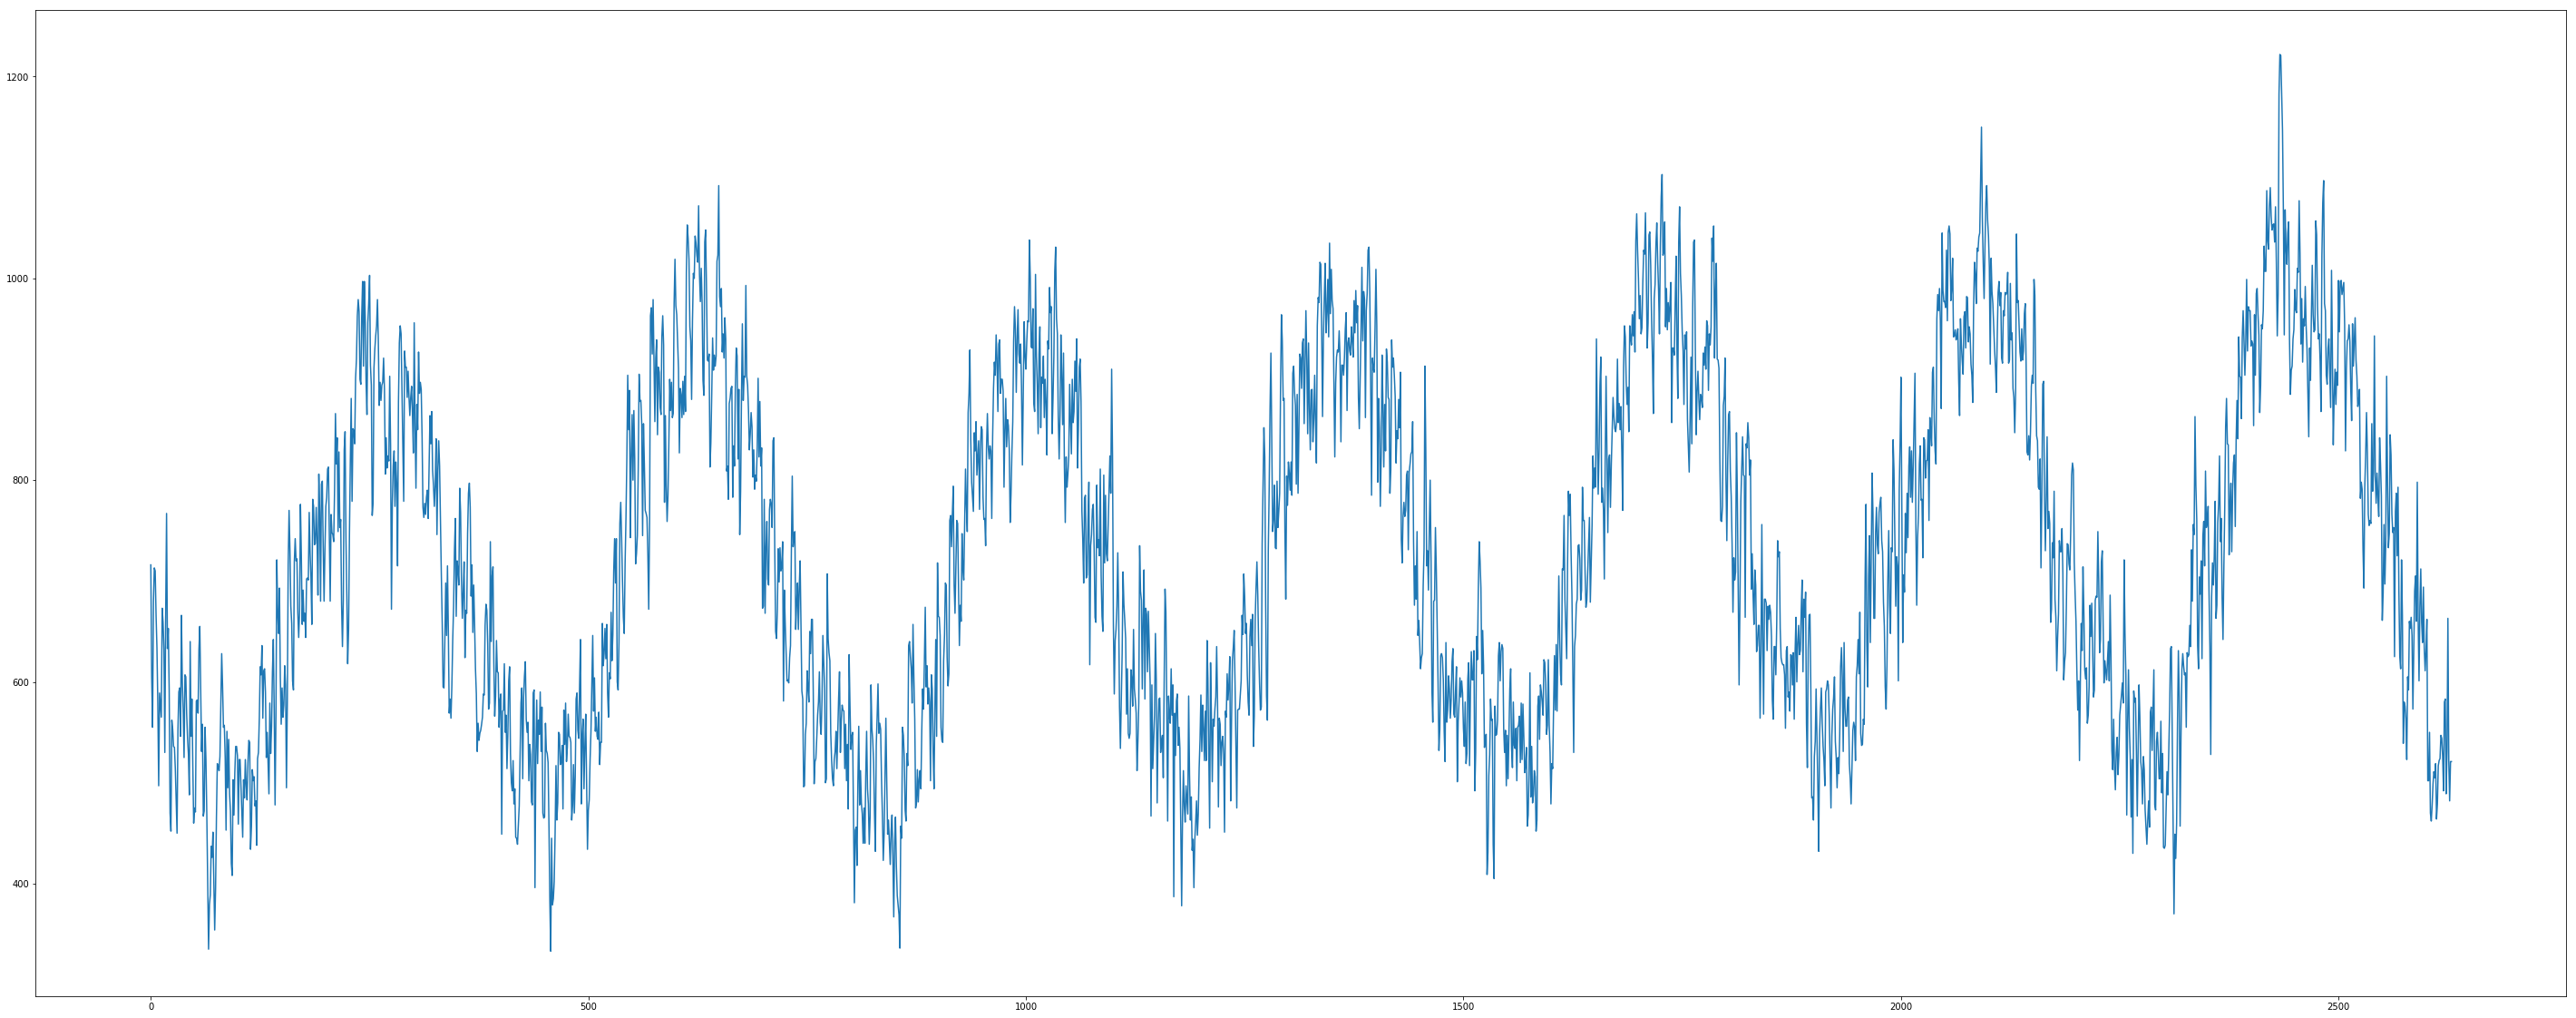

In [7]:
plt.figure(figsize=(50,20))
plt.plot(serie['A'],datosGas['Consumo'])
plt.show()

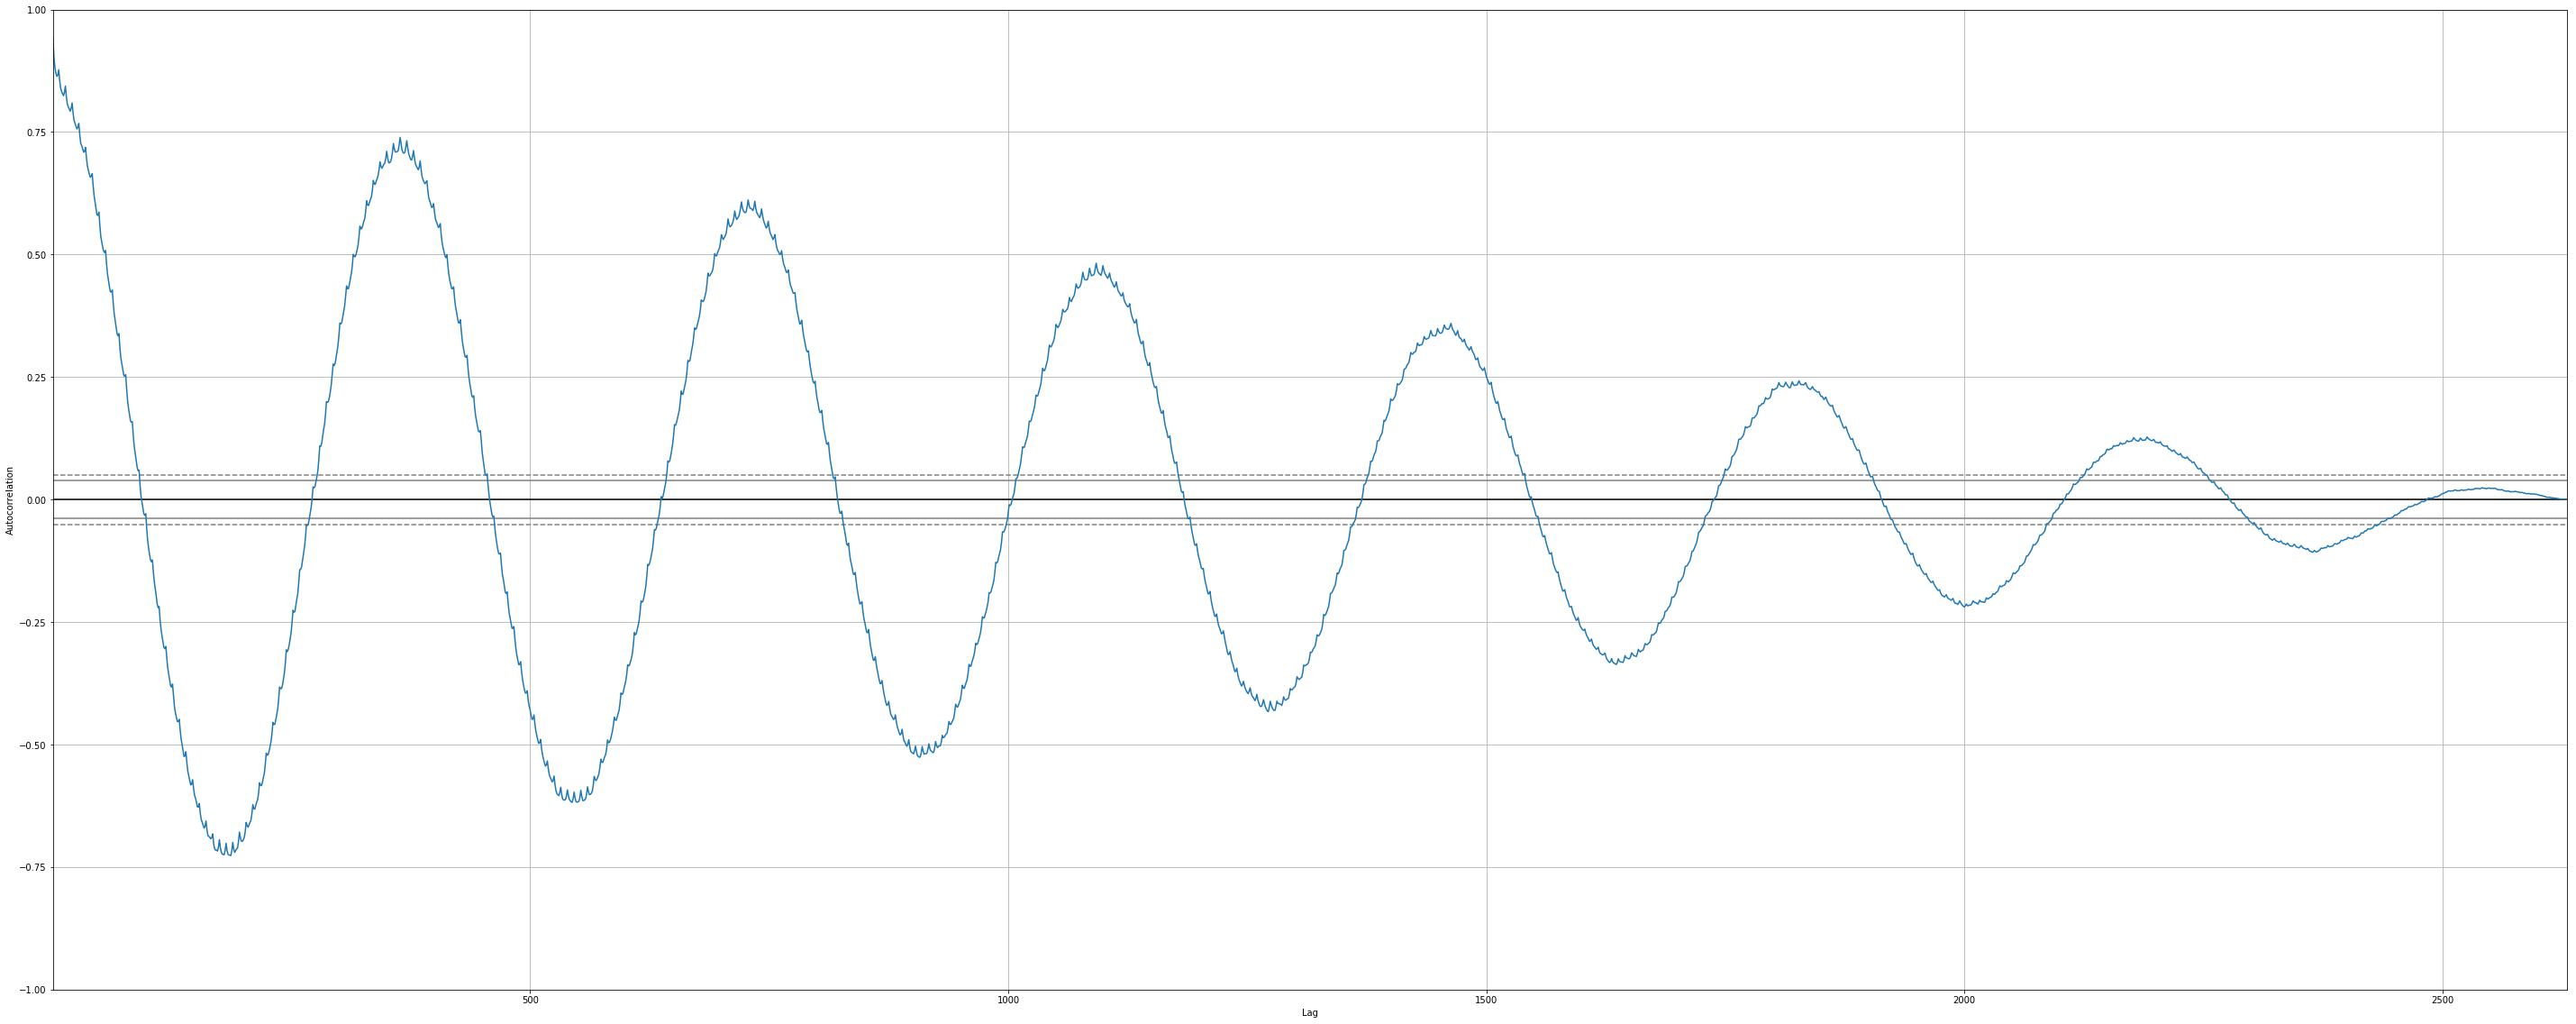

In [8]:
plt.figure(figsize=(50,20))
autocorrelation_plot(datosGas['Consumo'])

In [9]:
xe = datosGas['Consumo']/datosGas['Consumo'].max()

In [10]:
model = AR(xe)

In [11]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)

Lag: 27


In [12]:
predictions = model_fit.predict(dynamic=False)

In [13]:
error = mean_squared_error(xe[model_fit.k_ar:], predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.002


In [14]:
xe[model_fit.k_ar:].tail(), predictions.tail()

(2625    0.542553
 2626    0.427169
 2627    0.394435
 2628    0.426350
 2629    0.426350
 Name: Consumo, dtype: float64, 2625    0.449011
 2626    0.496949
 2627    0.419210
 2628    0.431191
 2629    0.439383
 dtype: float64)

In [15]:
coefficient_of_dermination = r2_score(xe[model_fit.k_ar:], predictions)

In [16]:
print('R2: %.3f' % coefficient_of_dermination)

R2: 0.914
